# Stochastic Gradient Descent 隨機梯度下降

這個方法在深度學習(deep learning)求解 weight 裡面也是常用的手法，我們這一次會講解他的原理以求解線性模型為例，
對他的原理有所了解對於以後去學習深度學習的模型會更快上手，如果有想要往(deep learning)這領域又覺得不得其門而入，
這一次要學習的內容是一個很好的起點。

## optimization

在介紹之前，我們先介紹找解的兩種方法，一種是直接找出問題的解，

- 例 1 : 解 2 元 1 次 方程式
$$
a x^2 + bx + c = 0
$$
解是 
$$
\frac{-b \pm \sqrt{b^2 -4ac}}{2a}
$$
或是
- 例 2 : 求 $f(x) = a x^2 + b x + c$ 的極值。
我們知道可以靠微積分，求微分為零的地方，帶進去就是候選的解。

但是我們人生的很多面對的問題是無法直接給出解答的，所以我們會退而求其次用啟發式算法(heuristic algorithm)，在深度學習的問題上，
要直接給出最優解是非常困難的，SGD的算法是常見的一種解法，

## heuristic

就算我們打算用啟發式的算法，這種退一步的算法，那該怎麼做啊!! <br>
其實在我們人生中也常用這種算法，當你被老闆交代一個任務，你沒有經驗，那該怎麼做，你可以隨便開始用一個方法，做就對了，之後開始檢討改進，我們只要不停地改進就能越做越好，
這種想法就是SGD的做法，我們如果要求某個函數的極值，我們就先隨機開始，再不停的找更好的解。

## calculus 微積分

假設我們現在已經理解 SGD 的想法，但是我們怎麼改進不停進步，在現實的工作如果你沒有經驗你需要不停的試錯，如果你有以前的經驗，你可以用你以前的工作經驗來找可能更好的方法，
但是在資料分析領域，你千萬不要忘記你大學的微積分老師，你學習的微積分在這邊會提供你往更好解的方向，我們下面看一個求極值的例子。

$$
f(x) = x^3 - 10 x^2 - x - 1
$$

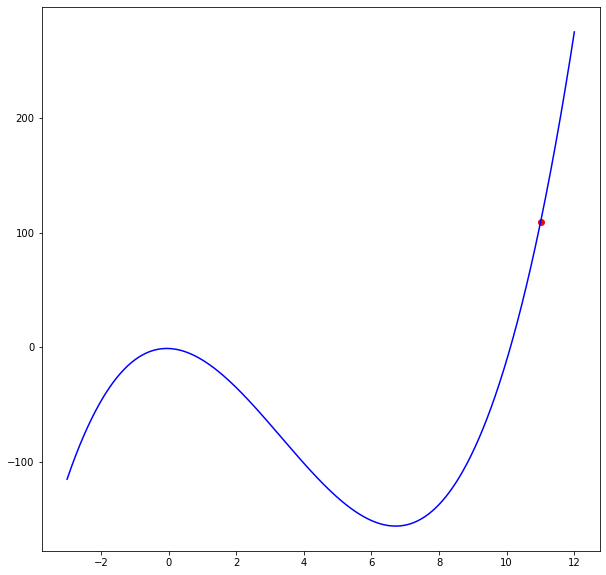

In [6]:
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

plt.rcParams['figure.figsize'] = [10, 10]

x = np.linspace(-3, 12, 1024) 
y = x**3 - 10 * x**2 - x - 1

plt.plot(x, y, c = 'b') 
plt.scatter(11, 11**3 - 10*11**2 - 11 - 1, c='r')
plt.show()

假設我們隨機選的 $x=11$如果我們想找更小的值，我們該往左找還是往右找?

## learning rate 步長

對的微積分會跟我們說，你為什麼不看看那個點的微分阿。
$$
\begin{align*}
f'(x)  &= 3x^2 - 20x - 1 \\
f'(11) &= 142 > 0
\end{align*}
$$

微分大於 $0$，代表往右函數值是變大，往左函數值是變小，所以我們要找更小的值要往左找。

$$
x_{new} = x_{old} - lr * f'(x_{old})
$$

其中的 $lr$ 是我們要往左走多長，這個 learning rate 的更新與找法在深度學習的調參是一個很重要的問題，但是這不是我們今天要談論的重點，下面來看如果我們是更高維度的函數該怎麼找更好的解。

$$
x_{new} = x_{old} - lr * \nabla f(x_{old})
$$

其中的 $\nabla f$ 是函數的梯度 (Gradient) ，就是高維度的微分，如果你都忘光光，你的微積分老師在哭泣，所以這個找極值的方法稱為 SGD 。

## Example
### 問題描述
假設我們有 $x_1, \cdots, x_n$ 與 $y_1, \cdots, y_n$，我們想要找到，斜率 $a$ 與 截距 $b$ 去估計 $y$
$$
a x + b \sim y
$$
等於我們要去解
$$
\min_{a,b} \frac{1}{n} \sum_i (y_i - (ax_i+b))^2
$$
令
$$
f(a,b) = \frac{1}{n} \sum_i (y_i - (ax_i+b))^2
$$
下面來求微分
$$
\begin{align*}
\frac{\partial f}{\partial a} &= \frac{1}{n} \sum_i 2 (y_i - (ax_i+b)) (-x_i)\\
\frac{\partial f}{\partial b} &= \frac{1}{n} \sum_i 2 (y_i - (ax_i+b))
\end{align*}
$$

所以我們可以隨機給定 $a, b$ 再去更新 $a,b$ 去找到更好的解，下面我們用python去實做 SGD ，大家看看就好，重在理解，不用手刻 SGD ，現在很多套件都做掉這一塊了。

iter=0 a=1.45 b=4.0711 cost=2.5
iter=10 a=1.65 b=4.1369 cost=1.0
iter=20 a=1.64 b=4.1699 cost=1.0
iter=30 a=1.64 b=4.2013 cost=1.0


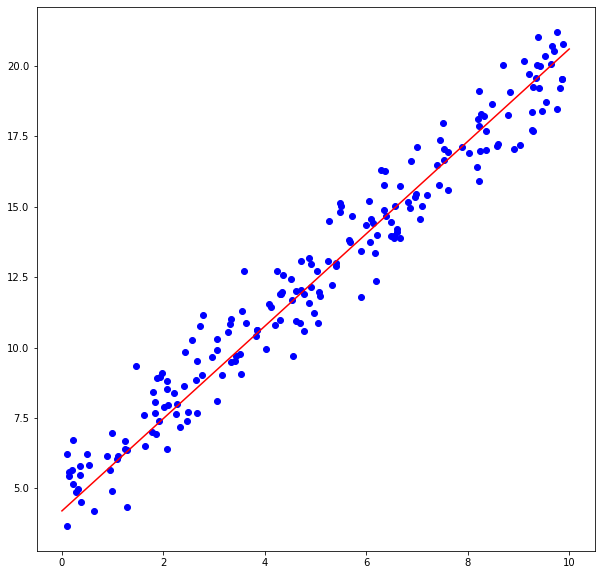

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [10, 10]

def update_ab(x, y, a, b, learning_rate):
    a_deriv = 0
    b_deriv = 0
    n = len(x)
    for i in range(n):
        # -2 x (y - (a x + b))
        a_deriv += -2*x[i] * (y[i] - (a*x[i] + b))
        # -2   (y - (a x + b))
        b_deriv += -2*(y[i] - (a*x[i] + b))
    # SGD rule
    a -= (a_deriv / n) * learning_rate
    b -= (b_deriv / n) * learning_rate
    return a, b

def cost_function(x, y, a, b):
    n = len(x)
    total_error = 0.0
    for i in range(n):
        total_error += (y[i] - (a*x[i] + b))**2
    return total_error / n


def train(x, y, a, b, learning_rate, iters):
    cost_history = []
    for i in range(iters):
        a, b = update_ab(x, y, a, b, learning_rate)
        cost = cost_function(x, y, a, b)
        cost_history.append(cost)
        
        if i % 10 == 0:
            print("iter={:d} a={:.2f} b={:.4f} cost={:.2}".format(i, a, b, cost))
    return a, b, cost_history

rands = np.random.RandomState(87)
x = 10 * rands.rand(200)
y = 1.5 * x + 5 + rands.randn(200)
plt.scatter(x, y, c = 'b')

_,_,_ = train(x, y, a=1, b=4, learning_rate=0.01, iters=31)

x = np.linspace(0,10,100)
y = 1.64*x + 4.2013

plt.plot(x, y, c = 'r') 
plt.show()

# 我們下面就開始 SGD 的實戰

Classification

In [8]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
import warnings
warnings.filterwarnings('ignore')

X, y = datasets.load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=87) 

# scikit learn 提供了 hinge ， modified_huber 與 log 三個 loss function 可以選
# scikit learn 提供了 l1 ， l2 與 elasticnet 三個可以選
# classifier = SGDClassifier(loss="hinge", penalty="l2", max_iter=20, early_stopping=True)
classifier = SGDClassifier(loss="hinge", penalty="l2", max_iter=20)
classifier.fit(X_train, y_train)

print('Training accuracy: ', classifier.score(X_train, y_train))
print('Testing accuracy: ', classifier.score(X_test, y_test))

Training accuracy:  0.9
Testing accuracy:  0.9


看看不同 iterration 的模型效果如何

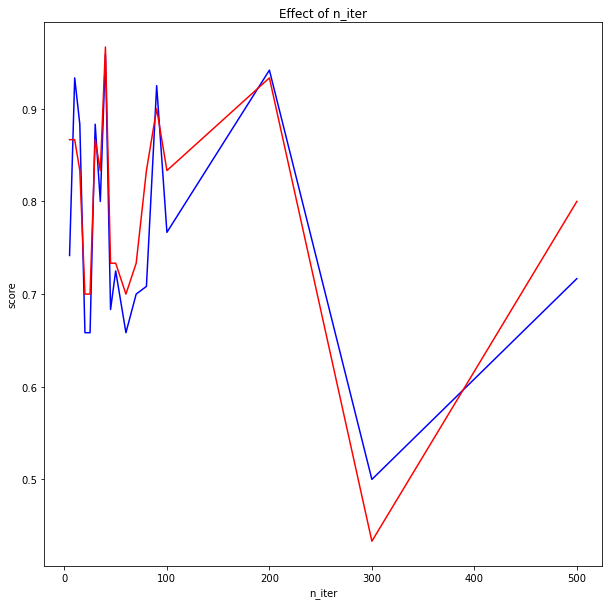

In [9]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

plt.rcParams['figure.figsize'] = [10, 10]

n_iters = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 60, 70, 80, 90, 100, 200, 300, 500]
scores_train = []
scores_test = []

for n_iter in n_iters:
    model = SGDClassifier(loss="hinge", penalty="l2", max_iter=n_iter)
    model.fit(X_train, y_train)
    scores_train.append(model.score(X_train, y_train))
    scores_test.append(model.score(X_test, y_test))

plt.title("Effect of n_iter")
plt.xlabel("n_iter")
plt.ylabel("score")
plt.plot(n_iters, scores_train, 'b', n_iters, scores_test, 'r')

如果給他提早停止效果會好嗎

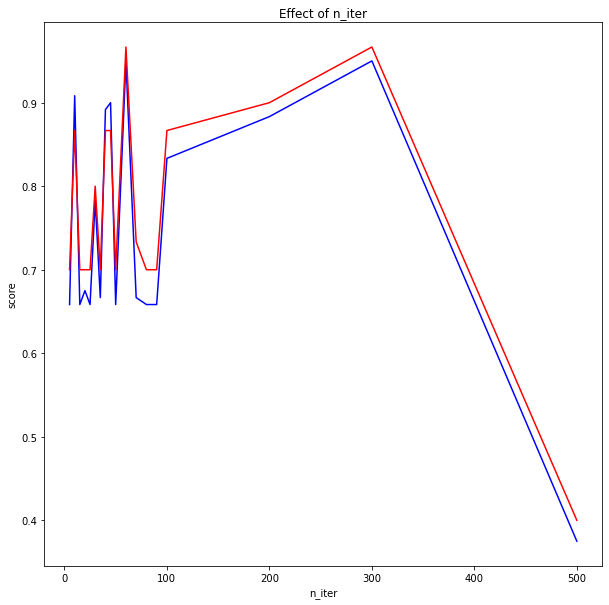

In [10]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

plt.rcParams['figure.figsize'] = [10, 10]

n_iters = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 60, 70, 80, 90, 100, 200, 300, 500]
scores_train = []
scores_test = []

for n_iter in n_iters:
    model = SGDClassifier(loss="hinge", penalty="l2", max_iter=n_iter, early_stopping=True)
    model.fit(X_train, y_train)
    scores_train.append(model.score(X_train, y_train))
    scores_test.append(model.score(X_test, y_test))

plt.title("Effect of n_iter")
plt.xlabel("n_iter")
plt.ylabel("score")
plt.plot(n_iters, scores_train, 'b', n_iters, scores_test, 'r')

Regression

In [11]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

X, y = datasets.load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=87)

# tol: The stopping criterion 停止的標準
regression = SGDRegressor(max_iter=100, tol=1e-3)
#regression = SGDRegressor(max_iter=10, tol=1e-3, early_stopping=True)
regression.fit(X_train, y_train)
y_pred = regression.predict(X_test)

print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

Mean squared error: 4802.79


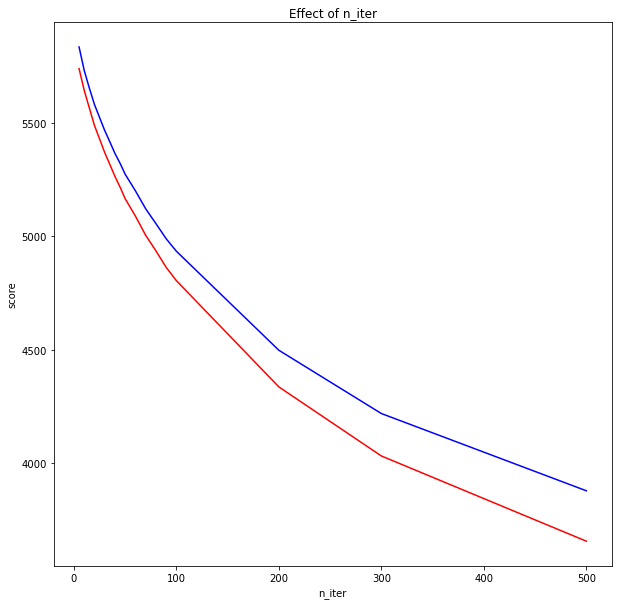

In [12]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

plt.rcParams['figure.figsize'] = [10, 10]

n_iters = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 60, 70, 80, 90, 100, 200, 300, 500]
scores_train = []
scores_test = []

for n_iter in n_iters:
    model = SGDRegressor(tol=1e-3, penalty="l2", max_iter=n_iter)
    model.fit(X_train, y_train)
    
    scores_train.append(mean_squared_error(y_train, model.predict(X_train)))
    scores_test.append(mean_squared_error(y_test, model.predict(X_test)))

plt.title("Effect of n_iter")
plt.xlabel("n_iter")
plt.ylabel("score")
plt.plot(n_iters, scores_train, 'b', n_iters, scores_test, 'r')

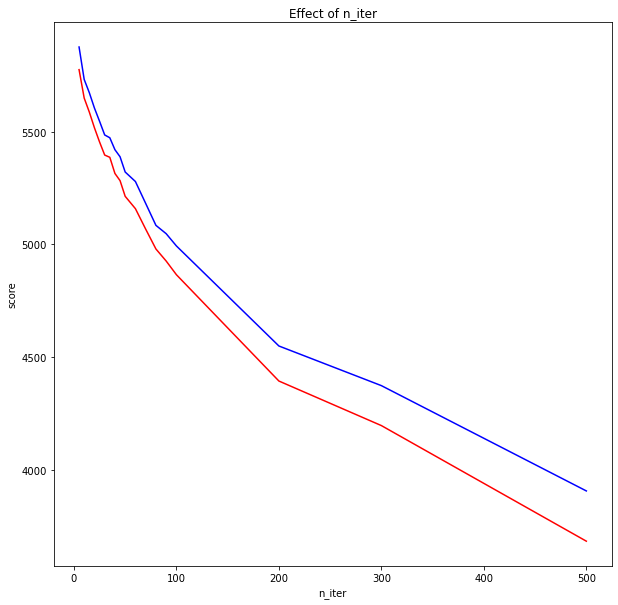

In [13]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

plt.rcParams['figure.figsize'] = [10, 10]

n_iters = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 60, 70, 80, 90, 100, 200, 300, 500]
scores_train = []
scores_test = []

for n_iter in n_iters:
    model = SGDRegressor(tol=1e-3, penalty="l2", max_iter=n_iter, early_stopping=True)
    model.fit(X_train, y_train)
    
    scores_train.append(mean_squared_error(y_train, model.predict(X_train)))
    scores_test.append(mean_squared_error(y_test, model.predict(X_test)))

plt.title("Effect of n_iter")
plt.xlabel("n_iter")
plt.ylabel("score")
plt.plot(n_iters, scores_train, 'b', n_iters, scores_test, 'r')